In [480]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import json

# print(plt.style.available)
plt.style.use('seaborn-whitegrid') # seaborn-darkgrid, seaborn-muted, seaborn-ticks, classic, seaborn-white, seaborn-whitegrid, bmh, fivethirtyeight
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 255)
pd.options.mode.chained_assignment = None

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']
marker = itertools.cycle(('D', 'o', 'h', '^', 's'))

%matplotlib inline

In [481]:
first_part = pd.DataFrame(json.load(open('../../benchmark-results-encrypt_load_embed_extractdata.json', 'r', encoding='utf8'))['benchmarks'])

# delete unnecessary columns
first_part.drop(
    labels=['run_type', 'repetitions', 'threads', 'run_name', 'cpu_time', 'time_unit', 'repetition_index'],
    axis=1,
    inplace=True
)
# Delete rows with medians and rows for each independent iteration
first_part = first_part[first_part['aggregate_name'].notna()]
first_part = first_part[~first_part.aggregate_name.str.contains("median")]
first_part.head(6)

,name,iterations,real_time,aggregate_name,MaxEmbeddingRate,maxUserDataBits
3,Encryptor_Encrypt_Airplane_512x512_bench_mean,3,3.174592,mean,NaN,NaN
5,Encryptor_Encrypt_Airplane_512x512_bench_stddev,3,0.026170,stddev,NaN,NaN
9,Encryptor_Encrypt_Crowd_512x512_bench_mean,3,3.012347,mean,NaN,NaN
11,Encryptor_Encrypt_Crowd_512x512_bench_stddev,3,0.028831,stddev,NaN,NaN
15,Encryptor_Encrypt_Man_512x512_bench_mean,3,2.970965,mean,NaN,NaN
17,Encryptor_Encrypt_Man_512x512_bench_stddev,3,0.002922,stddev,NaN,NaN


In [482]:
encryptor_part = first_part[first_part.name.str.contains("Encryptor_Encrypt_")]
encryptor_part.head(6)

,name,iterations,real_time,aggregate_name,MaxEmbeddingRate,maxUserDataBits
3,Encryptor_Encrypt_Airplane_512x512_bench_mean,3,3.174592,mean,NaN,NaN
5,Encryptor_Encrypt_Airplane_512x512_bench_stddev,3,0.026170,stddev,NaN,NaN
9,Encryptor_Encrypt_Crowd_512x512_bench_mean,3,3.012347,mean,NaN,NaN
11,Encryptor_Encrypt_Crowd_512x512_bench_stddev,3,0.028831,stddev,NaN,NaN
15,Encryptor_Encrypt_Man_512x512_bench_mean,3,2.970965,mean,NaN,NaN
17,Encryptor_Encrypt_Man_512x512_bench_stddev,3,0.002922,stddev,NaN,NaN


In [483]:
loader_part = first_part[first_part.name.str.contains("Loader_Load_")]
loader_part.head(6)

,name,iterations,real_time,aggregate_name,MaxEmbeddingRate,maxUserDataBits
45,Loader_Load_512x512_bench_mean,3,1.428103,mean,NaN,NaN
47,Loader_Load_512x512_bench_stddev,3,0.007808,stddev,NaN,NaN
51,Loader_Load_1024x1024_bench_mean,3,6.359576,mean,NaN,NaN
53,Loader_Load_1024x1024_bench_stddev,3,0.048200,stddev,NaN,NaN
57,Loader_Load_2048x2048_bench_mean,3,28.420310,mean,NaN,NaN
59,Loader_Load_2048x2048_bench_stddev,3,0.235333,stddev,NaN,NaN


In [484]:
embedder_part = {
    'Lena' : first_part[first_part.name.str.contains("Embedder_Embed_Lena_")],
    'Airplane' : first_part[first_part.name.str.contains("Embedder_Embed_Airplane_")],
    'Crowd' : first_part[first_part.name.str.contains("Embedder_Embed_Crowd_")],
    'Man' : first_part[first_part.name.str.contains("Embedder_Embed_Man_")],
    'Boat' : first_part[first_part.name.str.contains("Embedder_Embed_Boat_")]
}

embedder_part['Lena'].head(6)

,name,iterations,real_time,aggregate_name,MaxEmbeddingRate,maxUserDataBits
69,Embedder_Embed_Lena_512x512_bench/13/4/60/1_mean,3,58.650482,mean,0.258465,67755.0
71,Embedder_Embed_Lena_512x512_bench/13/4/60/1_stddev,3,1.846118,stddev,0.000000,0.0
75,Embedder_Embed_Lena_512x512_bench/13/4/60/2_mean,3,119.320400,mean,0.258465,67755.0
77,Embedder_Embed_Lena_512x512_bench/13/4/60/2_stddev,3,2.574556,stddev,0.000000,0.0
81,Embedder_Embed_Lena_512x512_bench/13/4/60/3_mean,3,215.366756,mean,0.258465,67755.0
83,Embedder_Embed_Lena_512x512_bench/13/4/60/3_stddev,3,2.741397,stddev,0.000000,0.0


In [485]:
second_part = pd.DataFrame(json.load(open('../../benchmark-results-recoverimage_recoverimageextractdata.json', 'r'))['benchmarks'])

# delete unnecessary columns
second_part.drop(
    labels=['run_type', 'repetitions', 'threads', 'run_name', 'cpu_time', 'time_unit', 'repetition_index'],
    axis=1,
    inplace=True
)
# Delete rows with medians and rows for each independent iteration
second_part = second_part[second_part['aggregate_name'].notna()]
second_part = second_part[~second_part.aggregate_name.str.contains("median")]

extractor_part = {
    'ExtractData' : extractor_extractdata_part,
    'RecoverImage' : second_part[second_part.name.str.contains("Extractor_RecoverImage_")],
    'RecoverImageExtractData' : second_part[second_part.name.str.contains("Extractor_RecoverImageExtractData_")]
}

second_part.head(6)

,name,iterations,real_time,PSNR,SSIM,aggregate_name
3,Extractor_RecoverImage_Boat_512x512_bench/13/4/60/1/iterations:3_mean,3,4.470122,45.718971,9.848504e-01,mean
5,Extractor_RecoverImage_Boat_512x512_bench/13/4/60/1/iterations:3_stddev,3,0.395779,0.000000,1.290478e-08,stddev
9,Extractor_RecoverImage_Boat_512x512_bench/13/4/60/2/iterations:3_mean,3,4.408000,42.744755,9.700720e-01,mean
11,Extractor_RecoverImage_Boat_512x512_bench/13/4/60/2/iterations:3_stddev,3,0.058176,0.000000,1.825012e-08,stddev
15,Extractor_RecoverImage_Boat_512x512_bench/13/4/60/3/iterations:3_mean,3,4.241233,38.118019,9.180379e-01,mean
17,Extractor_RecoverImage_Boat_512x512_bench/13/4/60/3/iterations:3_stddev,3,0.037267,0.000000,0.000000e+00,stddev


### Relationship between the parameter T and the maximum embedding rate $t_{max}$

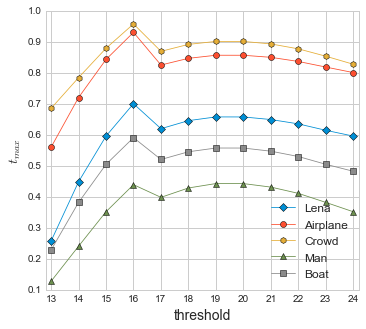

In [496]:
fig,ax = plt.subplots(figsize=(5, 5))

color = itertools.cycle(colors)

for key in embedder_part.keys():
    ax.plot([i for i in range(13, 25)], embedder_part[key][embedder_part[key].name.str.contains("_bench/.*/4/100/3_mean")]['MaxEmbeddingRate'], color=next(color), marker=next(marker), linewidth=0.8)

ax.legend(['Lena', 'Airplane', 'Crowd', 'Man', 'Boat'], loc ="lower right")
    
ax.set_xlabel("threshold", fontsize=14)
ax.set_ylabel("$t_{max}$", fontsize=14)
ax.ticklabel_format(useOffset=False)
plt.xticks(recover_image_threshold.threshold)

xticks, xticklabels = plt.xticks()
plt.xlim(xticks[0]-0.2, xticks[-1]+0.2)
plt.xticks(xticks)

fig.savefig('../../../docs/images/tmax_T.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Relationship between the parameter T and lambda.

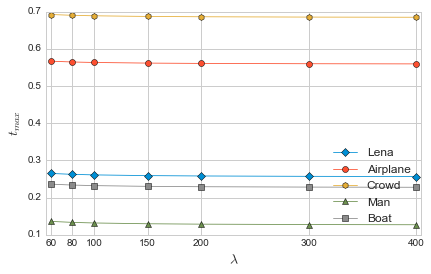

In [493]:
fig,ax = plt.subplots()
color = itertools.cycle(colors)
for key in embedder_part.keys():
    ax.plot([60, 80, 100, 150, 200, 300, 400], embedder_part[key][embedder_part[key].name.str.contains("_bench/13/6/.*/3_mean")]['MaxEmbeddingRate'], color=next(color), marker=next(marker), linewidth=0.8)

ax.legend(['Lena', 'Airplane', 'Crowd', 'Man', 'Boat'], loc ="lower right")
    
ax.set_xlabel("$\lambda$", fontsize=14)
ax.set_ylabel("$t_{max}$", fontsize=14)
ax.ticklabel_format(useOffset=False)
plt.xticks([60, 80, 100, 150, 200, 300, 400])

xticks, xticklabels = plt.xticks()
plt.xlim(xticks[0]-5, xticks[-1]+5)
plt.xticks(xticks)

fig.savefig('../../../docs/images/tmax_lambda.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Plot SSIM/PSNR against threshold

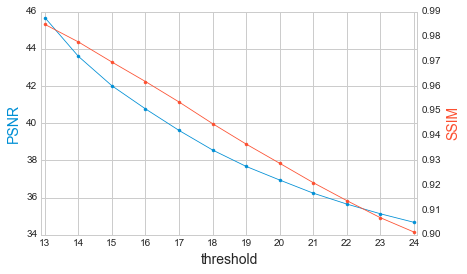

In [488]:
recover_image_threshold = extractor_part['RecoverImage'][extractor_part['RecoverImage'].name.str.contains("_bench/.*/6/400/1/iterations:3_mean")]
recover_image_threshold['threshold'] = [i for i in range(13, 25)]

fig,ax = plt.subplots()
plt.xticks(recover_image_threshold.threshold)
ax.plot(recover_image_threshold.threshold, recover_image_threshold.PSNR, color=colors[0], marker=".", linewidth=0.8)
ax.set_xlabel("threshold", fontsize=14)
ax.set_ylabel("PSNR", color=colors[0], fontsize=14)
ax.ticklabel_format(useOffset=False)

xticks, xticklabels = plt.xticks()
plt.xlim(xticks[0]-0.1, xticks[-1]+0.1)
plt.xticks(xticks)

ax2=ax.twinx()
ax2.grid(False)
ax2.ticklabel_format(useOffset=False)
ax2.plot(recover_image_threshold.threshold, recover_image_threshold.SSIM, color=colors[1], marker=".", linewidth=0.8)
ax2.set_ylabel("SSIM", color=colors[1], fontsize=14)
plt.show()
fig.savefig('../../../docs/images/PSNR_SSIM_threshold.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Plot SSIM/PSNR against alpha

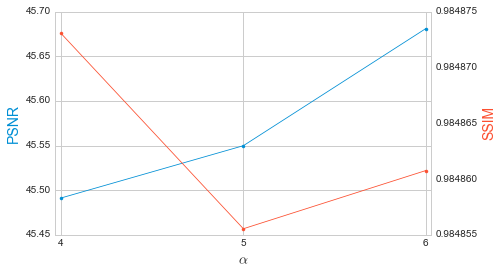

In [492]:
recover_image_alpha = extractor_part['RecoverImage'][extractor_part['RecoverImage'].name.str.contains("_bench/13/.*/400/1/iterations:3_mean")]
recover_image_alpha['alpha'] = [4, 5, 6]

fig,ax = plt.subplots()
plt.xticks(recover_image_alpha.alpha)
ax.plot(recover_image_alpha.alpha, recover_image_alpha.PSNR, color=colors[0], marker=".", linewidth=0.8)
ax.set_xlabel("$\\alpha$", fontsize=14)
ax.set_ylabel("PSNR", color=colors[0], fontsize=14)
ax.ticklabel_format(useOffset=False)

xticks, xticklabels = plt.xticks()
plt.xlim(xticks[0]-0.03, xticks[-1]+0.03)
plt.xticks(xticks)

ax2=ax.twinx()
ax2.grid(False)
ax2.ticklabel_format(useOffset=False)
ax2.plot(recover_image_alpha.alpha, recover_image_alpha.SSIM, color=colors[1], marker=".", linewidth=0.8)
ax2.set_ylabel("SSIM", color=colors[1], fontsize=14)
plt.show()
fig.savefig('../../../docs/images/PSNR_SSIM_alpha.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Plot SSIM/PSNR against lamda

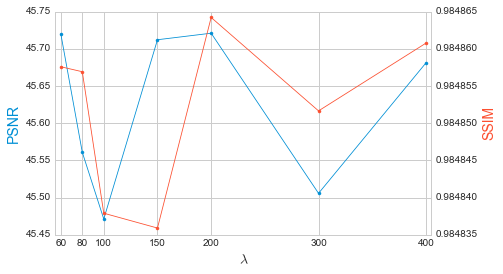

In [490]:
recover_image_lambda = extractor_part['RecoverImage'][extractor_part['RecoverImage'].name.str.contains("_bench/13/6/.*/1/iterations:3_mean")]
recover_image_lambda['lambda'] = [60, 80, 100, 150, 200, 300, 400]

fig, ax = plt.subplots()
plt.xticks(recover_image_lambda['lambda'])
ax.plot(recover_image_lambda['lambda'], recover_image_lambda.PSNR, color=colors[0], marker=".", linewidth=0.8)
ax.set_xlabel("$\lambda$", fontsize=14)
ax.set_ylabel("PSNR", color=colors[0], fontsize=14)
ax.ticklabel_format(useOffset=False)

xticks, xticklabels = plt.xticks()
plt.xlim(xticks[0]-5, xticks[-1]+5)
plt.xticks(xticks)

ax2=ax.twinx()
ax2.grid(False)
ax2.ticklabel_format(useOffset=False)
ax2.plot(recover_image_lambda['lambda'], recover_image_lambda.SSIM, color=colors[1], marker=".", linewidth=0.8)
ax2.set_ylabel("SSIM", color=colors[1], fontsize=14)
plt.show()
fig.savefig('../../../docs/images/PSNR_SSIM_lambda.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')

### Plot SSIM/PSNR against lsb-layers

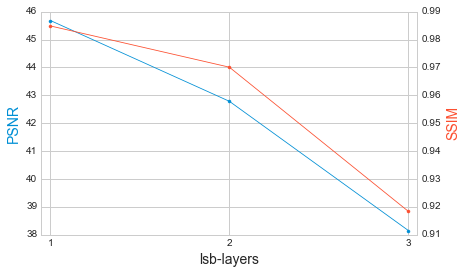

In [491]:
recover_image_lsb = extractor_part['RecoverImage'][extractor_part['RecoverImage'].name.str.contains("_bench/13/6/400/.*/iterations:3_mean")]
recover_image_lsb['lsb'] = [1, 2, 3]

# create figure and axis objects with subplots()
fig, ax = plt.subplots()
plt.xticks(np.arange(1, 4, 1.0))
ax.plot(recover_image_lsb['lsb'], recover_image_lsb.PSNR, color=colors[0], marker=".", linewidth=0.8)

xticks, xticklabels = plt.xticks()
xmin = xticks[0]-abs(xticks[0] - xticks[1])*0.05
xmax = xticks[-1]+abs(xticks[-1] - xticks[-2])*0.05
plt.xlim(xmin, xmax)
plt.xticks(xticks)

ax.set_xlabel("lsb-layers", fontsize=14)
ax.set_ylabel("PSNR", color=colors[0], fontsize=14)
ax.ticklabel_format(useOffset=False)

ax2=ax.twinx()
ax2.grid(False)
ax2.ticklabel_format(useOffset=False)
ax2.plot(recover_image_lsb['lsb'], recover_image_lsb.SSIM, color=colors[1], marker=".", linewidth=0.8)
ax2.set_ylabel("SSIM", color=colors[1], fontsize=14)
plt.show()
fig.savefig('../../../docs/images/PSNR_SSIM_lsb-layers.jpg',
            format='jpeg',
            dpi=400,
            bbox_inches='tight',
            facecolor='w')